<a href="https://colab.research.google.com/github/gmdeorozco/Exploratory-Data-Analysis/blob/main/Replica3_FeatureEng_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load Data 
sep = \t

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv'
data = pd.read_csv(URL, sep='\t')

## 4. Create a dataset including Gr Liv Area lower or equal to 4000

In [3]:
data2 = data.loc[data['Gr Liv Area'] <= 4000]

## 5. We're going to first do some basic data cleaning on this data:

- Converting categorical variables to dummies
  - Filter by String Categoricals
  - List categorical fields
  - Show fields
  - Convert to dummies

In [4]:
string_cols = data2.dtypes[data2.dtypes==object]

In [5]:
string_cols = string_cols.index.values.tolist()

In [7]:
data2[string_cols].describe().T

,count,unique,top,freq
MS Zoning,2925,7,RL,2268
Street,2925,2,Pave,2913
Alley,198,2,Grvl,120
Lot Shape,2925,4,Reg,1859
Land Contour,2925,4,Lvl,2631
Utilities,2925,3,AllPub,2922
Lot Config,2925,5,Inside,2138
Land Slope,2925,3,Gtl,2784
Neighborhood,2925,28,NAmes,443
Condition 1,2925,9,Norm,2519


In [9]:
data2 = pd.get_dummies(data2, columns=string_cols, drop_first=True )
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


- Making skew variables symmetric
  - Create list of float columns to check for skewing
  - define a limit above which we will log tranform
  - Show skewed columns
  - Create before and after histogram for 'BsmtFin SF 1'

In [15]:
mask = data2.dtypes == float
float_cols = data2.columns[mask]

skew_limit = 0.75
skew_vals = data2[float_cols].skew()

In [17]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew)>{}'.format(skew_limit))
             )
skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


Text(0.5, 0.98, 'Field BsmtFin SF 1')

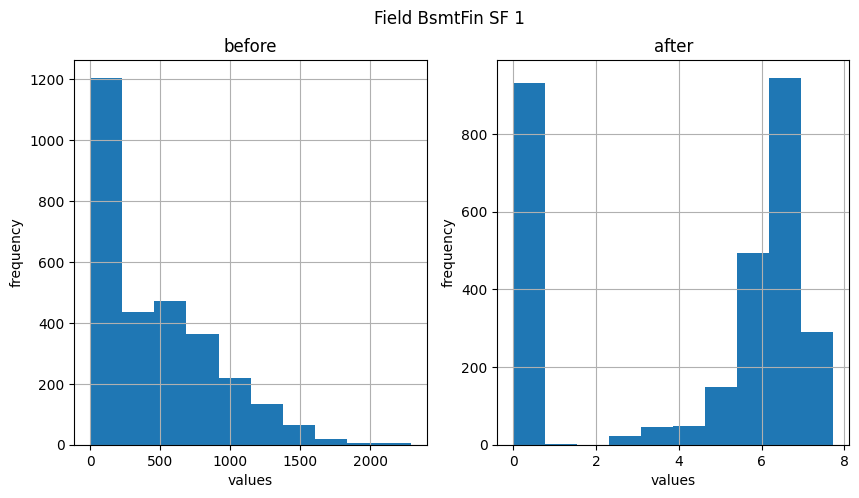

In [18]:
field = 'BsmtFin SF 1'
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(10,5))

data2[field].hist(ax=ax_before)
data2[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before', xlabel='values', ylabel='frequency')
ax_after.set(title='after', xlabel='values', ylabel='frequency')

fig.suptitle('Field {}'.format(field))

## 6. Perform skew tranformation with a for loop for all except 'SalesPrice'

In [19]:
for col in skew_cols.index.values:
  if col == 'SalePrice':
    continue
  data2[col] = data2[col].apply(np.log1p)


## 7. Show this partial dataset and fill with Zero any incomplete -> 'Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces',         'Garage Cars','SalePrice'

##8. Do Pairplot of features

### 9. Define X and y
using ->
'Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
      'Garage Cars'

# Basic feature engineering: adding polynomial and interaction terms

## Polynomial **Features**

### 10. Create X2 a copy of X with 'OQ2' and 'GLA2' as pow 2

### 11. Create X3, a copy of X2 with a multiplicative interaction 'Overall Qual' and 'Year Built'

### 12. On X3 create division interaction 'Overall Qual' and 'Lot Area'

### 13. Count 'House Style'

### 14. Do a quick view of how dummy features actually appear for House Style

## 15. Create a list of Neighborhoods with less than 8
- Counst all values
- Create X4, a copy of X3 where the replace is made

## Getting to fancier features add deviation feature for 'House Style' and 'Year Built', and for 'Overall Qual' and 'Neighborhood'

# Polynomial Features in Scikit-Learn


Import the library and Instantiate